<a href="https://colab.research.google.com/github/piyush-pk47/SQL-Leetcode-Challenge/blob/master/alzimerDetectionSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset

100% 28.0M/28.0M [00:01<00:00, 26.5MB/s]
100% 28.0M/28.0M [00:01<00:00, 20.1MB/s]


In [7]:
import zipfile
zip_ref=zipfile.ZipFile("/content/alzheimer-mri-dataset.zip","r")
zip_ref.extractall('/content')
zip_ref.close();

In [8]:
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()

In [9]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'/content/Dataset/Very_Mild_Demented/*')
mild = glob(r'/content/Dataset/Mild_Demented/*')
moderate = glob(r'/content/Dataset/Moderate_Demented/*')

#Dataset without Alzheimer
non = glob(r'/content/Dataset/Non_Demented/*')

/content/Dataset/Non_Demented/non_1858.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

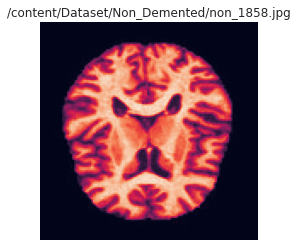

In [10]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

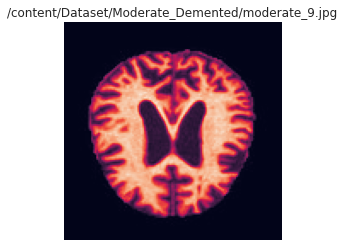

In [11]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

**SVM for Alzheimer Detection**

In [14]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)

ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)


In [15]:
print(len(non))
print(len(ALZ)) #data are well transformed. Let's conduct SVM
print(len(resized_image_array))
print(resized_image_array[1])

#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

3200
3200
6400
[0 0 0 ... 0 0 0]


In [ ]:
clf = svm.SVC(kernel = 'linear')

In [ ]:
clf.fit(train_x, train_y)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(train_x)

In [ ]:
y_true = train_y

In [ ]:
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
f1 :  1.0


In [ ]:
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Confusion matrix : [[2573    0]
 [   0 2547]]


In [ ]:
y_pred = clf.predict(test_x)

In [ ]:
y_true = test_y

In [ ]:
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

Accuracy :  0.98515625


In [ ]:
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred))

Precision :  0.9817629179331308
Recall :  0.9892802450229708
f1 :  0.9855072463768115


In [ ]:
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Confusion matrix : [[615  12]
 [  7 646]]


In [ ]:
import joblib
joblib.dump(clf,'/content/drive/MyDrive/AlzimerSVMModel/model.h5')

['/content/drive/MyDrive/AlzimerSVMModel/model.h5']

**SVM RBF KERNAL**

In [16]:
clf = svm.SVC(kernel = 'rbf')

In [17]:
clf.fit(train_x, train_y)

SVC()

In [18]:
y_pred = clf.predict(train_x)

In [19]:
y_true = train_y

In [20]:
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.865625
Precision :  0.8510954326030449
Recall :  0.8887165568049632
f1 :  0.8694992412746586
Confusion matrix : [[2140  401]
 [ 287 2292]]


In [21]:
y_pred = clf.predict(test_x)

In [22]:
y_true = test_y

In [23]:
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.8125
Precision :  0.780559646539028
Recall :  0.8534621578099839
f1 :  0.8153846153846154
Confusion matrix : [[510 149]
 [ 91 530]]


**SVM for Alzheimer Classifier**

In [24]:
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

#Iterate over pictures and resize them to 256 by 256
def resizer(image_directory):
    for file in image_directory: #tried with os.listdir but could work with os.walk as well
        img = Image.open(file) #just putting image_directory or file does not work for google colab, interesting. 
        #preserve aspect ratio
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        elif image_directory == very_mild:
            resized_image_array_label.append(1)
        elif image_directory == mild:
            resized_image_array_label.append(2)
        else:
            resized_image_array_label.append(3)

resizer(non)
resizer(very_mild)
resizer(mild)
resizer(moderate)
#split the data to test and training
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)

In [25]:
clf = svm.SVC(kernel = 'linear')

In [26]:
clf.fit(train_x, train_y)

SVC(kernel='linear')

In [27]:
y_pred = clf.predict(train_x)

In [28]:
y_true = train_y

In [29]:
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

Accuracy :  1.0


In [30]:
y_pred = clf.predict(test_x)

In [31]:
y_true = test_y

In [32]:
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))

Accuracy :  0.98359375
